# Non-uniform sampling in the infinite-horizon Lorentz gas 

In [1]:
using BilliardModels
include("../src/BilliardVisualisation.jl")

INFO: Loading help data...


bdraw (generic function with 7 methods)

## Calculate and draw grazing collisions with consecutive discs 

In [2]:
function grazing_collision(x, c, radius)  
    # compute position vectors of grazing collision on disc with centre c and radius r from point x

    disp = c - x
    sinθ = radius / norm(disp)
    θ = asin(sinθ)
    
    R = [cos(θ) -sin(θ); sin(θ) cos(θ)]  # rotation matrix
    direction1 = Vector2D( R * [disp[1], disp[2]] ) 
    direction2 = Vector2D( transpose(R) * [disp[1], disp[2]] )  # rotate in other direction
    
    direction1 = normalize(direction1) 
    direction2 = normalize(direction2)                          
    
    length = sqrt(normsq(disp) - radius^2)

    (x + length*direction1, x + length*direction2)
    
end

grazing_collision (generic function with 1 method)

In [101]:
ioff()
fig, axes = plt.subplots();
ion()

In [102]:
radius = 0.36
billiard_table = Sinai_billiard(radius, true, true);

In [103]:
for x in 0:1, y in 0:5
    bdraw(billiard_table, axes, Vector2D(x,y))
end

axes[:axis]("image")

(-0.5,1.3599999999999999,-0.5,5.36)

In [211]:
function initial_condition_in_channel(radius)
    xx = initial_condition(billiard_table,radius,0.5,0,0.5)[1]
    x, y = mod(xx[1], 1), mod(xx[2], 1)
    x, y
end

initial_condition_in_channel (generic function with 1 method)

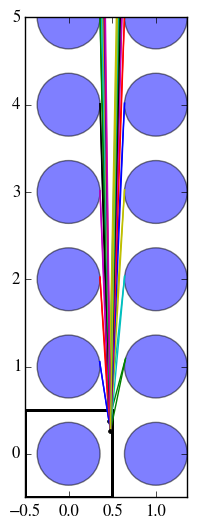

In [212]:
max_distance = 100  # limit to where generate

x, y = initial_condition_in_channel(radius)
xx = Vector2D(x, y)

grazing_points_list = Any[]

for z in 1:max_distance
    c = Vector2D(0., float(z))
    grazing_points = grazing_collision(xx, c, radius)
    grazing_point1 = grazing_points[2]  # rightmost in first column
    
    c = Vector2D(1., float(z))
    grazing_points = grazing_collision(xx, c, radius)
    grazing_point2 = grazing_points[1]  # leftmost in second column
    
    push!(grazing_points_list, (grazing_point1, grazing_point2))
    

    
end

for (grazing_point1, grazing_point2) in grazing_points_list[1:10]

    axes[:plot]( [x, grazing_point1[1]], [y, grazing_point1[2]])
    axes[:plot]( [x, grazing_point2[1]], [y, grazing_point2[2]])
end


axes[:plot](x, y, ".")

axes[:set_ylim](-0.5, 5)
fig

In [97]:
grazing_points_list;

## Calculate angles 

In [106]:
allowed_angles = Any[];

for (grazing_point1, grazing_point2) in grazing_points_list
    disp = grazing_point1 - xx
    angle1 = atan2(disp)
    
    disp = grazing_point2 - xx
    angle2 = atan2(disp)
    
    push!(allowed_angles, [angle2, angle1])
end
    

In [107]:
allowed_angles

100-element Array{Any,1}:
 [1.30891,1.72511]
 [1.46204,1.63254]
 [1.50288,1.60917]
 [1.52149,1.59862]
 [1.53211,1.59261]
 [1.53897,1.58873]
 [1.54377,1.58603]
 [1.54731,1.58403]
 [1.55003,1.5825] 
 [1.55219,1.58128]
 [1.55394,1.58029]
 [1.55539,1.57948]
 [1.55661,1.57879]
 ⋮                
 [1.56878,1.57193]
 [1.5688,1.57192] 
 [1.56882,1.57191]
 [1.56884,1.5719] 
 [1.56886,1.57189]
 [1.56888,1.57187]
 [1.5689,1.57186] 
 [1.56892,1.57185]
 [1.56894,1.57184]
 [1.56896,1.57183]
 [1.56898,1.57182]
 [1.569,1.57181]  

In [108]:
angle_ranges = 
Any[(allowed_angles[i][1], allowed_angles[i+1][1], allowed_angles[i+1][2], allowed_angles[i][2]) for i in 1:length(allowed_angles)-1]

99-element Array{Any,1}:
 (1.3089090020012568,1.4620406790098737,1.6325417432997922,1.7251059147303622)
 (1.4620406790098737,1.5028771216142394,1.609172752237159,1.6325417432997922) 
 (1.5028771216142394,1.5214906766404208,1.5986151020285368,1.609172752237159) 
 (1.5214906766404208,1.532112558522995,1.5926085433850783,1.5986151020285368) 
 (1.532112558522995,1.5389741808800925,1.5887337700809383,1.5926085433850783) 
 (1.5389741808800925,1.5437703535307652,1.5860274089061965,1.5887337700809383)
 (1.5437703535307652,1.5473110726935813,1.5840303816365702,1.5860274089061965)
 (1.5473110726935813,1.5500319805328033,1.5824961982111108,1.5840303816365702)
 (1.5500319805328033,1.5521881426047472,1.5812806947790607,1.5824961982111108)
 (1.5521881426047472,1.553938792977785,1.5802939367690565,1.5812806947790607) 
 (1.553938792977785,1.555388463139542,1.5794769155454917,1.5802939367690565)  
 (1.555388463139542,1.5566086086256277,1.5787893092034682,1.5794769155454917) 
 (1.5566086086256277,1.5576

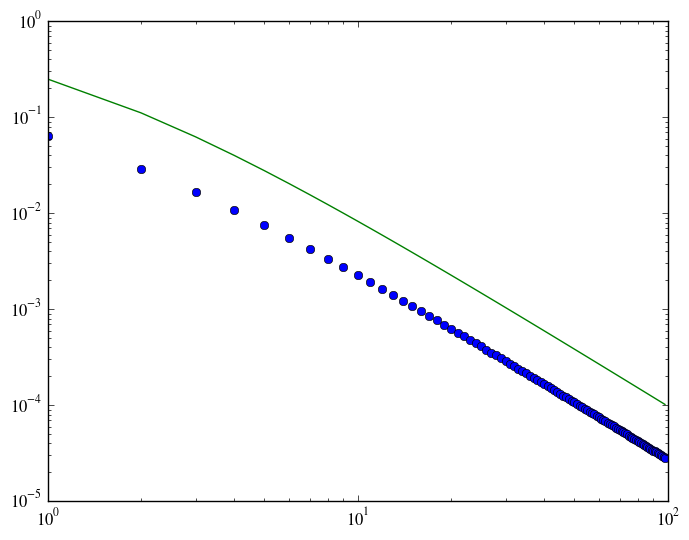

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1233af990>

In [155]:
# sizes of intervals (too naive) gives power law with exponent -2:
sizes = [b-a+d-c for (a,b,c,d) in angle_ranges]

loglog(sizes, "o")
loglog([1.:length(sizes)].^(-2))

In [158]:
# generate a uniform random number from the interval [a,b] or the interval [c,d]
function uniform_from_two_intervals(a, b, c, d)
    total_length = (b-a) + (d-c)
    r = rand()*total_length
    
    if r < (b-a)
        a + r
    else
        c + r - (b-a)
    end
end

uniform_from_two_intervals (generic function with 1 method)

In [110]:
test_interval = (1.240769282967916,1.418688135881282,1.5775049626322863,1.586722425763836)  

(1.240769282967916,1.418688135881282,1.5775049626322863,1.586722425763836)

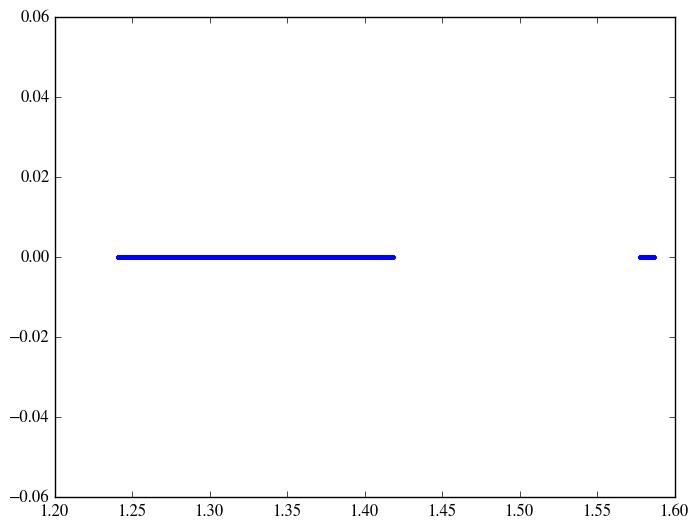

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12381b650>

In [159]:
data = Float64[]
for i in 1:1000
    push!(data, uniform_from_two_intervals(test_interval...))
end

plot(data, zeros(data), ".")

## Generate initial conditions 

In [182]:
using Distributions
using StatsBase

In [319]:
#probs = ones(max_distance-1)  # impose the desired probability distribution
#probs = collect(1:max_distance-1)  # -1 since have angle differences. Replace by treating remaining angles correctly

probs = collect(1.:max_distance-1).^(-1)

probs /= sum(probs);

chooser = sampler(Categorical(probs));   # from Distributions

AliasTable with 99 entries

Check that the distribution comes out correctly:

In [169]:
# Calculate histogram:
# counts = countmap(frequencies)  # from StatsBase
# kk = collect(keys(counts)); plot(kk, [counts[k] for k in kk], "o", )

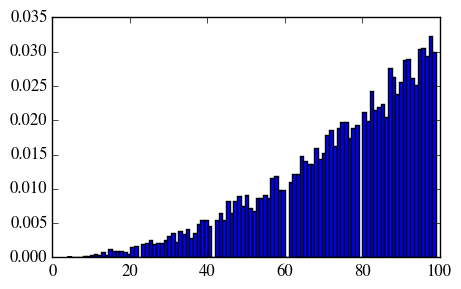

In [206]:
N = 10000; frequencies = rand(chooser, N);

figure(figsize=(5, 3))
plt.hist(frequencies, 100, normed=true);

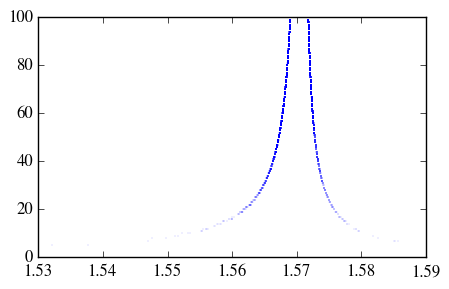

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12c20d310>

In [207]:
N = 10000  # num of initial conditions

heights = Any[]
angles = Any[]

for i in 1:N
    height = rand(chooser)
    angle = uniform_from_two_intervals(angle_ranges[height]...)
    
    push!(heights, height)
    push!(angles, angle)
    
    #@show height, angle
end    

figure(figsize=(5,3))
plot(angles, heights, ".", alpha=0.5, markersize=0.3)


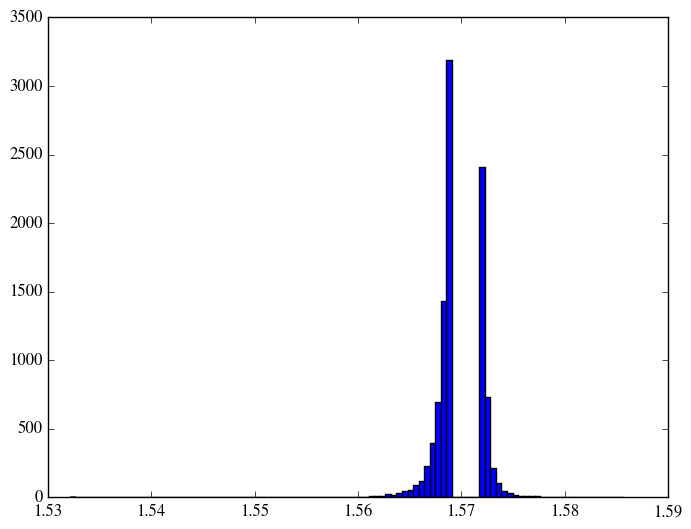

In [208]:
plt.hist(angles, 100);

## Non-uniform sampling 

- Generate uniform initial position e.g. inside the channel
- Generate height
- Find corresponding angle range
- Generate sin(angle) uniformly in the available range

In [335]:
function calculate_grazing_angles(xx, height)
    
    angles = Float64[]
    
    for z in [height-1, height]
        c = Vector2D(1., float(z))  # centre of disc
        grazing_points = grazing_collision(xx, c, radius)
        grazing_point = grazing_points[2]  # rightmost in first column

        disp = grazing_point - xx
        push!(angles, atan2(disp))

        c = Vector2D(0., float(z))
        grazing_points = grazing_collision(xx, c, radius)
        grazing_point = grazing_points[1]  # leftmost in second column

        disp = grazing_point - xx
        push!(angles, atan2(disp))
    end

    [angles[1], angles[3], angles[4], angles[2]]
    
end


# generate an initial condition by sampling the height from the imposed distribution
# and then sampling the angle "uniformly" in the available angles:

function sample(height_chooser)  
    x, y = initial_condition_in_channel(radius)
    xx = Vector2D(x, y)
    
    height = rand(height_chooser)
    while height == 1
        height = rand(height_chooser)
    end

    angles = calculate_grazing_angles(xx, height)

    angle = uniform_from_two_intervals(angles...)

    xx, angle, height
end


sample (generic function with 1 method)

In [337]:
# Setup:
radius = 0.36

#probs = ones(1.:max_distance-1)
probs = float(sizes)
#probs = collect(1.:max_distance-1).^()
probs /= sum(probs);
height_chooser = sampler(Categorical(probs));   # from Distributions

AliasTable with 99 entries

In [340]:
angles = Float64[]
N = 100000
for i in 1:N
    xx, angle, height = sample(height_chooser)
    push!(angles, angle)
end

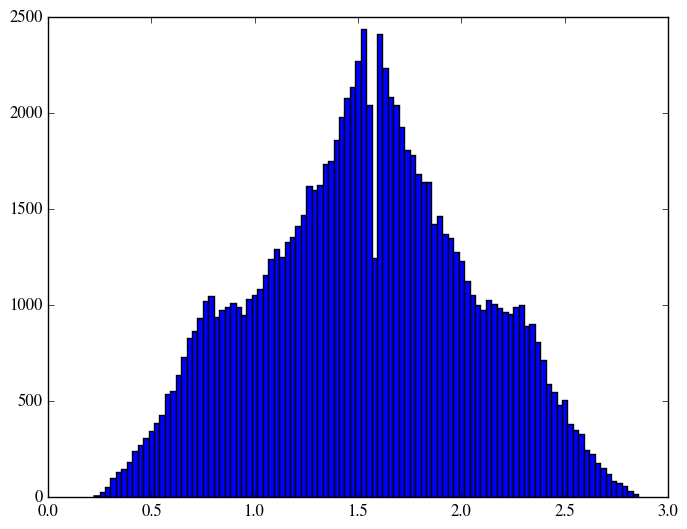

In [341]:
plt.hist(angles, 100);

## Calculate true angle distribution: 

Probability to fall in given angle interval is given by the sines of the angles: